## 텐서플로우를 활용한 연산

In [3]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()

In [4]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype="float32")
x

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [5]:
x = x.reshape(1, 3, 3, 1)
x

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)

In [6]:
w = np.array([
    [2, 0],
    [0, 0]
], dtype="float32")
w

array([[2., 0.],
       [0., 0.]], dtype=float32)

In [7]:
w = w.reshape(2, 2, 1, 1)
w

array([[[[2.]],

        [[0.]]],


       [[[0.]],

        [[0.]]]], dtype=float32)

In [11]:
conv = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding="SAME")
conv

<tf.Tensor: id=2, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 2.],
         [ 4.],
         [ 6.]],

        [[ 8.],
         [10.],
         [12.]],

        [[14.],
         [16.],
         [18.]]]], dtype=float32)>

In [18]:
max_pool = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="VALID")
max_pool

<tf.Tensor: id=4, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[10.],
         [12.]],

        [[16.],
         [18.]]]], dtype=float32)>

In [20]:
def relu(x):
    return np.maximum(x, 0)

In [21]:
q = np.array([-1, 2, -3, 4, -5])
q

array([-1,  2, -3,  4, -5])

In [22]:
relu(q)

array([0, 2, 0, 4, 0])

In [23]:
tf.nn.relu(q)

<tf.Tensor: id=7, shape=(5,), dtype=int32, numpy=array([0, 2, 0, 4, 0])>

## 텐서플로를 이용한 CNN2

In [24]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [28]:
image = np.array([[
    [[1], [2], [3]],
    [[4], [5], [6]],
    [[7], [8], [9]]
]], dtype="float32")
image

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]], dtype=float32)

In [29]:
image.shape

(1, 3, 3, 1)

In [30]:
image.reshape(3, 3)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

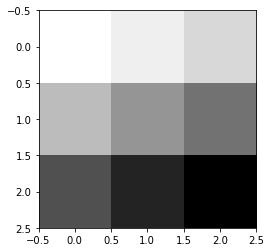

In [32]:
plt.imshow(image.reshape(3, 3), cmap='Greys')
plt.show()

In [45]:
weight = np.array([[1, 1], [1, 1]])
weight.resize( 2, 2, 1, 1)
weight

array([[[[1]],

        [[1]]],


       [[[1]],

        [[1]]]])

In [46]:
weight.shape

(2, 2, 1, 1)

In [47]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d

<tf.Tensor: id=11, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)>

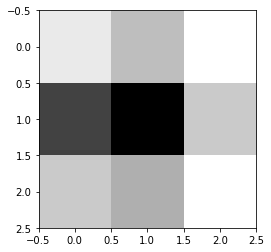

In [50]:
plt.imshow(conv2d.numpy().reshape(3, 3), cmap='Greys')
plt.show()

In [51]:
image = np.array([[[[4], [3]], [[2], [1]]]], dtype="float32")
image

array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)

In [54]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding="SAME")
pool

<tf.Tensor: id=19, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[4.],
         [3.]],

        [[2.],
         [1.]]]], dtype=float32)>